<a href="https://colab.research.google.com/github/alyssa-sha/KNN_Diabetes/blob/main/KNN_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using KNN to predict diabetes
This is a python notebook to guide you on how to read, explore and analyze a diabetes dataset by utilizing a supervised machine learning model to finish a classification task. 

Scikit-learn is a popular Machine Learning library for Python. In this notebook, we will use it to build a machine learning model using k-Nearest Neighbors algorithm to predict whether the patients in the "Pima Indians Diabetes Dataset" have diabetes or not.

### Background
**What is Diabetes?**
Diabetes is a chronic disease that occurs either when the pancreas does not produce enough insulin or when the body cannot effectively use the insulin it produces. Insulin is a hormone that regulates blood sugar. Hyperglycaemia, or raised blood sugar, is a common effect of uncontrolled diabetes and over time leads to serious damage to many of the body's systems, especially the nerves and blood vessels.

Prediction of diabetes at an early stage can lead to improved treatment. Machine learning techniques are widely used for prediction of disease at an early stage. In this notebook, diabetes is predicted using significant attributes, such as patients' BMI, insulin level, age, etc.

## About Dataset

You can find the data source from here: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

**Context**
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Content**
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

**Acknowledgements**
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

**To do**
Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes?

## Download data
Download data from Wattle/Kaggle (https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)
## Upload data to Colab


In [ ]:
#Download the dataset from wattle/kaggle and upload it to Co-lab from your local repository
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


# Data Pre-Processing Steps:
Before we start analysing the dataset, we need to make sure our data looks clean and tidy. Data pre-processing steps are the tasks we want to go through first to get ready for traning our ML model. In this case, data pre-processing includes reading data, extracing features and labels, splitting training and testing datasets, and scaling the features.

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as mtp
import pandas as pd

In [ ]:
# read dataset
data_set = pd.read_csv('diabetes.csv')
data_set

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# Extracting Independent and dependent Variable
x = data_set.drop('Outcome',axis=1).values
y = data_set['Outcome'].values

In [ ]:
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [ ]:
# feature Scaling
from sklearn.preprocessing import StandardScaler

st_x = StandardScaler()
X_train = st_x.fit_transform(x_train)
X_test = st_x.transform(x_test)

# Model fitting
Now we will fit the K-NN classifier to the training data. To do this we will import the KNeighborsClassifier class of Sklearn Neighbors library. After importing the class, we will create the Classifier object of the class.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

## Observe the accuracies for different values of k

In [ ]:
# Setup arrays to store training and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the model
    knn.fit(X_train, y_train)

    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

train_accuracy

array([1.        , 0.82465278, 0.84027778, 0.80555556, 0.80555556,
       0.77256944, 0.78298611, 0.76736111])

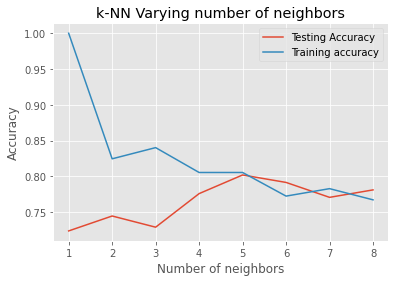

In [ ]:
#Generate plot
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

## Fitting K-NN classifier to the training set
The Parameter of 'KNeighborsClassifier' class will be n_neighbors: To define the required neighbors of the algorithm. We choose 5 according to the accuracy level metric='minkowski': This is the default parameter and it decides the distance between the points. p=2: It is equivalent to the standard Euclidean metric.

In [ ]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
#let us get the predictions using the classifier we had fit above
y_pred= knn.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0])


**Now we have succefully predicted whether the patients in our testing dataset have diabetes or not, but how accurate are we? Do we have any methods to evaluate our predicted results? How do we determine the overall model performance on this classification task?**

**We will dig into the evaluation methods during our next tutorial. If you are interested, please read and explore the code below first!**

------------------------------------------------------------------------------




# Result evaluation
Now it's time to test how accurate are we! Here are a few different ways to show the evaluation results:
## Accuracy score

In [ ]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.8020833333333334

The overall accuracy of the prediction of diabetes dataset by applying the KNN classifier model is .802 which means the model performs well in this scenario.

## Confusion Matrix

In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[114,  16],
       [ 22,  40]])

Considering confusion matrix above:

True negative = 114

False positive = 16

True postive = 40

Fasle negative = 22

Confusion matrix can also be obtained using crosstab method of pandas.

In [ ]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,114,16,130
1,22,40,62
All,136,56,192


Text(0.5, 15.0, 'Predicted label')

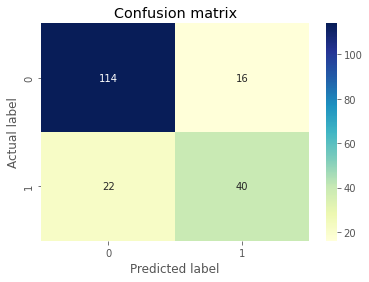

In [ ]:
import seaborn as sns
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Classification Report

In [ ]:
#import classification_report
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       130
           1       0.71      0.65      0.68        62

    accuracy                           0.80       192
   macro avg       0.78      0.76      0.77       192
weighted avg       0.80      0.80      0.80       192



**Precision** — The ability of a classifier not to label an instance positive that is actually negative. 

**Recall** — The ability of a classifier to find all positive instances. F1-score — A weighted harmonic mean of precision and recall such that the best score is 1 and the worst is 0. 

**Support** — The number of actual occurrences of the class in the specified dataset.

## ROC - AUC

ROC (Receiver Operating Characteristic) Curve tells us about how good the model can distinguish between two things (e.g If a patient has a disease or no). Better models can accurately distinguish between the two. Whereas, a poor model will have difficulties in distinguishing between the two

Well Explained in this video: https://www.youtube.com/watch?v=OAl6eAyP-yo

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

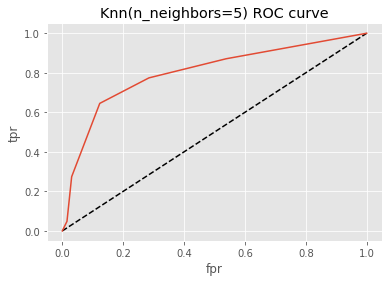

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr') #fpr: false positive rate
plt.ylabel('tpr') #tpr: true positive rate
plt.title('Knn(n_neighbors=5) ROC curve')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8004962779156328

When 0.5<AUC<1, there is a high chance that the classifier will be able to distinguish the positive class values from the negative class values. This is so because the classifier is able to detect more numbers of True positives and True negatives than False negatives and False positives.